### Idea

‰∏îÂì•‰πãÂâçÂú®Ë™ûÊ≥ïÂ≠∏ÁöÑ term paper ‰ΩøÁî® PTT Ë™ûÊñôÔºåÂàÜÊûê‰∫Ü<strong>„ÄåV ÁúãÁúã„Äç</strong> Âíå<strong>„ÄåVV Áúã„Äç</strong>Ôºàe.g., Ë©¶ÁúãÁúã Âíå Ë©¶Ë©¶ÁúãÔºâÁöÑÂãïË©ûÂÖ±ÁèæÈ†ªÁéáÂíåË™ûÂ¢É„ÄÇ
‰ªñÁôºÁèæ

- <strong>„ÄåV ÁúãÁúã„Äç</strong>Âá∫ÁèæÁöÑÈ†ªÁéáÊõ¥È´ò„ÄÅÊê≠ÈÖçÁöÑÂãïË©ûÁ®ÆÈ°û‰πüÊõ¥Â§ö
- _Ë©¶„ÄÅÂïè_ Á≠âÂãïË©ûÊòéÈ°ØÂÇæÂêëËàá<strong>„ÄåV ÁúãÁúã„Äç</strong>ÂÖ±ÁèæÔºà2188 vs 5; 1539 vs 13Ôºâ
- _Áûß„ÄÅÊîª_ Á≠âÂãïË©ûÂè™ÊúâÂíå<strong>„ÄåVV Áúã„Äç</strong>ÂÖ±ÁèæÁöÑË≥áÊñô

‰∏çÈÅé‰∏îÂì•‰πüÊÉ≥Áü•ÈÅìÂú® Dcard Ë´ñÂ£áÊòØ‰∏çÊòØ‰πüÊúâÁõ∏‰ººÁöÑÁãÄÊ≥ÅÔºåÊñºÊòØ‰ªñÊÉ≥Ë´ã‰Ω†Âà©Áî®Ë≥¶Á•ûÁà¨ÂèñÁöÑ Dcard Ë≤ºÊñá raw dataÔºà197 ÂÄã foldersÔºåÂÖ± 20069 ÂÄã jsonÔºâÔºåÊâæÂá∫

1. Âú®<strong>„ÄåV ÁúãÁúã„Äç</strong>ÁöÑ V-slot ÊúÄÂ∏∏Âá∫ÁèæÁöÑ 10 ÂÄãÂãïË©ûÂíåË©ûÊÄßÔºàe.g., VC, VE, or VA)
2. Âú®<strong>„ÄåVV Áúã„Äç</strong>ÁöÑ V-slot ÊúÄÂ∏∏Âá∫ÁèæÁöÑ 10 ÂÄãÂãïË©ûÂíåË©ûÊÄß
3. Âú®ÂÖ©ÂÄãÊßãÂºèÁöÑ V-slot Âá∫ÁèæÊ¨°Êï∏Á∏ΩÂíåÊúÄÂ§öÁöÑÂâç 10 ÂÄãÂãïË©û
4. Âú®ÂÖ©ÂÄãÊßãÂºèÁöÑ V-slot Âá∫ÁèæÊ¨°Êï∏Â∑ÆÁï∞ÊúÄÂ§ßÁöÑÂâç 10 ÂÄãÂãïË©û
5. Âú®ÂÖ©ÂÄãÊßãÂºèÁöÑ V-slot ÈÉΩÊúâÂá∫ÁèæÁöÑÂãïË©û



### Environment Setting

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import re
import os
import json
from tqdm import tqdm 
import joblib
import pickle

### Preprocess posts

In [ ]:
forum_folders1 = os.listdir("./data/dcard_popular")
forum_folders2 = os.listdir("./data/dcard_latest")

len(forum_folders1), len(forum_folders2)

99

In [ ]:
# dcard_popular (forum_folders1)
posts = []
for forum in tqdm(forum_folders1):
    if forum != ".DS_Store":
        forum_path = f"./data/dcard_popular/{forum}"
        jsonfiles = os.listdir(forum_path)
        for jsonfile in jsonfiles:
            jsonpath = f"{forum_path}/{jsonfile}"
            with open(jsonpath, "r", encoding="utf-8") as f:
                post = json.load(f)
                posts.append(post)
len(posts)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 99/99 [00:00<00:00, 674.17it/s]


1529

In [ ]:
# dcard_latest (forum_folders2)
latest = []
for forum in tqdm(forum_folders2)):
    if forum != ".DS_Store":
        forum_path = f"./data/dcard_latest/{forum}"
        jsonfiles = os.listdir(forum_path)
        for jsonfile in jsonfiles:
            jsonpath = f"{forum_path}/{jsonfile}"
            with open(jsonpath, "r", encoding="utf-8") as f:
                post = json.load(f)
                latest.append(post)
len(latest)

In [ ]:
posts_v2 = posts + latest
#with open("./data/posts_v2.json", "w", encoding="utf-8") as f:
 #   json.dump(posts_v2, f, ensure_ascii=False)

**Read posts_v2.json**

In [4]:
with open("./data/posts_v2.json", "r", encoding="utf-8") as f:
    posts_v2 = json.load(f)

In [5]:
len(posts_v2)

20069

In [6]:
# Post metadata
for post in posts_v2[:1]:
    print(post.keys())

dict_keys(['id', 'title', 'content', 'excerpt', 'anonymousSchool', 'anonymousDepartment', 'pinned', 'forumId', 'replyId', 'createdAt', 'updatedAt', 'commentCount', 'likeCount', 'tags', 'topics', 'supportedReactions', 'withNickname', 'reportReason', 'hiddenByAuthor', 'meta', 'forumName', 'forumAlias', 'school', 'replyTitle', 'gender', 'personaSubscriptable', 'reactions', 'hidden', 'customStyle', 'isSuspiciousAccount', 'layout', 'withImages', 'withVideos', 'media', 'reportReasonText', 'mediaMeta', 'postAvatar'])


In [7]:
# pick out the columns we want
results = []
for p in posts_v2:
    data = [p['id'],  p['createdAt'], p['forumName'], p['gender'], p['title'], p['content'], p['topics'], p['commentCount'], p['likeCount']]
    results.append(data)

len(results)

20069

In [8]:
# create a dataframe
df = pd.DataFrame(results, columns=['id', 'createdAt', 'forum', 'gender', 'title','content','topics','commentCount','likeCount'])
df.head()

id                 createdAt  forum gender                   title  \
0  233006165  2020-02-03T04:47:26.058Z  Apple      M              #ÂïèÈ°å ÈóúÊñºSiri   
1  233012413  2020-02-04T02:11:08.007Z  Apple      F     iPhone 11 ÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïäüò≠   
2  232795451  2019-12-31T03:40:36.331Z  Apple      M       Apple Êùø  Mac ÊïôÂ≠∏ÊñáÁ´†   
3  233010090  2020-02-03T14:59:06.646Z  Apple      M        Ë´ãÂïèÂ§ßÂÆ∂ÈÉΩÂì™Ë£°Ë≤∑‰∫îÊòüÊ¢ÖËä±Ëµ∑Â≠êÂëÄÔºü   
4  233005085  2020-02-02T20:05:18.803Z  Apple      M  Ë¶ÅÊèõiphone11 ÈÇÑÊòØÁ≠âiphone12   

                                             content  \
0  https://megapx-assets.dcard.tw/images/45dbac63...   
1  #ÂïèÈ°å\n#Ê±ÇÊïë\n#ÊÄ•Âú®Á∑öÁ≠â\n#HELP \n\n\nÊú¨‰∫∫‰ΩøÁî®iphone11\n‰ªäÂ§©ÁÑ°...   
2  ÂìàÂõâÂ§ßÂÆ∂Â•Ω\nÊàëÊòØ Apple ÊùøÊùø‰∏ª Macintosh \n\nÊúâÈëëÊñºÁâàÂèãÊúâÂïèÈ°åÈúÄË¶ÅÂçîÂä©...   
3  ‰ªäÂ§©Âéª‰∫ÜÂÖâËèØÊüêÂÆ∂ÈõªÂ≠êÊùêÊñôË°å\n\nÂ∏åÊúõË≤∑Âà∞ÂèØ‰ª•ÊãÜmacbook pro ÁöÑËÉåËìãÁöÑÊ¢ÖËä±Ëµ∑Â≠ê\n...   
4  Â∞èÂºüËèúÂë≥ÊøÉÔºåËã•ÊúâÈåØË™§È∫ªÁÖ©Â§öÂ§öÂåÖÂê´üòÖüòÖ\nÂ∞èÂºüÁõÆÂâçÁî®8 ‰ΩøÁî®Á¥ÑÂÖ©Âπ¥ÔºåÊìç‰Ωú‰∏äÈÉΩÈÇÑÂæàÈ†ÜÔºåÊ≤í‰ªÄÈ∫ºÂ§ßÂïè...   

                        topics  commentCount  likeCount  
0             [Apple, ÂïèÈ°å, Ê±ÇÊïëÊñá]             0          3  
1                 [ÊâãÊ©ü, iPhone]             3          0  
2       [ÊïôÂ≠∏, Apple, ÂïèÈ°å, macOS]             9         13  
3    [diy, Ëµ∑Â≠ê, Ê¢ÖËä±, macbook, Á¥Ø]             7          0  
4  [iPhone, ÊâãÊ©ü, Ë©¢Âïè, ÂïèÈ°å, Apple]            33          8

**Cleaning**

In [10]:
trash_re = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

def clean(texts, trash_re):
    output = []
    for text in texts:
        text = re.sub(trash_re, '', str(text))
        output.append(text)
    return output

def clean_title(texts):
    title_re = "@\S+|https?:\S+|http?:\S|\W"
    output = []
    for text in texts:
        text = re.sub(title_re, '', str(text))
        output.append(text)
    return output

In [11]:
df['content_clean'] = clean(df['content'], trash_re)
df.head()

id                 createdAt  forum gender                   title  \
0  233006165  2020-02-03T04:47:26.058Z  Apple      M              #ÂïèÈ°å ÈóúÊñºSiri   
1  233012413  2020-02-04T02:11:08.007Z  Apple      F     iPhone 11 ÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïäüò≠   
2  232795451  2019-12-31T03:40:36.331Z  Apple      M       Apple Êùø  Mac ÊïôÂ≠∏ÊñáÁ´†   
3  233010090  2020-02-03T14:59:06.646Z  Apple      M        Ë´ãÂïèÂ§ßÂÆ∂ÈÉΩÂì™Ë£°Ë≤∑‰∫îÊòüÊ¢ÖËä±Ëµ∑Â≠êÂëÄÔºü   
4  233005085  2020-02-02T20:05:18.803Z  Apple      M  Ë¶ÅÊèõiphone11 ÈÇÑÊòØÁ≠âiphone12   

                                             content  \
0  https://megapx-assets.dcard.tw/images/45dbac63...   
1  #ÂïèÈ°å\n#Ê±ÇÊïë\n#ÊÄ•Âú®Á∑öÁ≠â\n#HELP \n\n\nÊú¨‰∫∫‰ΩøÁî®iphone11\n‰ªäÂ§©ÁÑ°...   
2  ÂìàÂõâÂ§ßÂÆ∂Â•Ω\nÊàëÊòØ Apple ÊùøÊùø‰∏ª Macintosh \n\nÊúâÈëëÊñºÁâàÂèãÊúâÂïèÈ°åÈúÄË¶ÅÂçîÂä©...   
3  ‰ªäÂ§©Âéª‰∫ÜÂÖâËèØÊüêÂÆ∂ÈõªÂ≠êÊùêÊñôË°å\n\nÂ∏åÊúõË≤∑Âà∞ÂèØ‰ª•ÊãÜmacbook pro ÁöÑËÉåËìãÁöÑÊ¢ÖËä±Ëµ∑Â≠ê\n...   
4  Â∞èÂºüËèúÂë≥ÊøÉÔºåËã•ÊúâÈåØË™§È∫ªÁÖ©Â§öÂ§öÂåÖÂê´üòÖüòÖ\nÂ∞èÂºüÁõÆÂâçÁî®8 ‰ΩøÁî®Á¥ÑÂÖ©Âπ¥ÔºåÊìç‰Ωú‰∏äÈÉΩÈÇÑÂæàÈ†ÜÔºåÊ≤í‰ªÄÈ∫ºÂ§ßÂïè...   

                        topics  commentCount  likeCount  \
0             [Apple, ÂïèÈ°å, Ê±ÇÊïëÊñá]             0          3   
1                 [ÊâãÊ©ü, iPhone]             3          0   
2       [ÊïôÂ≠∏, Apple, ÂïèÈ°å, macOS]             9         13   
3    [diy, Ëµ∑Â≠ê, Ê¢ÖËä±, macbook, Á¥Ø]             7          0   
4  [iPhone, ÊâãÊ©ü, Ë©¢Âïè, ÂïèÈ°å, Apple]            33          8   

                                       content_clean  
0  Ë´ãÂïè‰∏Ä‰∏ãÂ¶Ç‰ΩïÂà™Èô§ÈÄôÂÄãÂª∫Ë≠∞ÈÄôÈöªÊâãÊ©üÊòØÂÆ∂‰∫∫‰∏çË¶ÅÁî®Áµ¶ÊàëÁî®ÁöÑÁà¨‰∫ÜÂæàÂ§öÊñáÁ´†‰πü‰∏çÁü•ÈÅìÊÄéÈ∫ºÂà™ÂèàÊàñËÄÖÊòØÊàëÊêúÂ∞ã...  
1  ÂïèÈ°åÊ±ÇÊïëÊÄ•Âú®Á∑öÁ≠âÊú¨‰∫∫‰ΩøÁî®‰ªäÂ§©ÁÑ°Ë´ñÂ¶Ç‰ΩïÈÉΩÂè´‰∏çÂá∫‰πüÁúã‰∫ÜË®≠ÂÆöÈÉΩÊúâÈñãÂïüÁöÑÊúçÂãô‰∏çÁü•ÈÅìÁÇ∫‰ªÄÈ∫ºÂ∞±ÊòØÂè´‰∏çÂá∫‰æÜ...  
2  ÂìàÂõâÂ§ßÂÆ∂Â•ΩÊàëÊòØÊùøÊùø‰∏ªÊúâÈëëÊñºÁâàÂèãÊúâÂïèÈ°åÈúÄË¶ÅÂçîÂä©ÊôÇÁÑ°Ê≥ïÂú®ÁâàÊâæÂà∞Á≠îÊ°àÊÉ≥Ë´ãÂêÑ‰ΩçÊùøÂèãÊèê‰æõÂïèÈ°åÊàñÊòØÊÉ≥Ë¶Å‰∫Ü...  
3  ‰ªäÂ§©Âéª‰∫ÜÂÖâËèØÊüêÂÆ∂ÈõªÂ≠êÊùêÊñôË°åÂ∏åÊúõË≤∑Âà∞ÂèØ‰ª•ÊãÜÁöÑËÉåËìãÁöÑÊ¢ÖËä±Ëµ∑Â≠ê‰ΩÜÁµêÊûú‰ªñÊòéÊòéÂ∞±ÊòØÁï´ÁöÑ‰∏ÄÈ°Ü‰∫îËßíÊòüÊòüÂõûÂÆ∂...  
4  Â∞èÂºüËèúÂë≥ÊøÉËã•ÊúâÈåØË™§È∫ªÁÖ©Â§öÂ§öÂåÖÂê´Â∞èÂºüÁõÆÂâçÁî®‰ΩøÁî®Á¥ÑÂÖ©Âπ¥Êìç‰Ωú‰∏äÈÉΩÈÇÑÂæàÈ†ÜÊ≤í‰ªÄÈ∫ºÂ§ßÂïèÈ°åÂè™ÊúâÈõªÊ±†Á∫åËà™ÂäõÊúâ...

In [14]:
# filter out rows that only has numbers in content_clean / len==1
str_rowids = []
for i,r in df.iterrows():
    if type(r['content_clean']) != float:
        if len(r['content_clean']) >1:
            str_rowids.append(i)

len(str_rowids)

20025

In [ ]:
df = df.iloc[str_rowids]

In [20]:
# remove duplicates
df.drop_duplicates("content_clean", inplace=True)
df.shape

(19898, 10)

In [21]:
#df.to_csv('./data/dcard_df_cleaned.csv',encoding='utf-8',index=False)

### Tokenization & POS tagging

In [21]:
df = pd.read_csv('./data/dcard_df_cleaned.csv',encoding='utf-8')

In [ ]:
!pip install ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter
from ckip_transformers.nlp import CkipPosTagger

In [22]:
# WS
ws_driver = CkipWordSegmenter(device=0)

In [23]:
dcard_ws = ws_driver(df['content_clean'], use_delim = False)
dcard_segmented = [" ".join(ls) for ls in dcard_ws]

Inference: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [13:13<00:00,  7.86s/it]


In [24]:
#joblib.dump(dcard_ws, "./data/dcard_ws.pkl")
#joblib.dump(dcard_segmented, "./data/dcard_segmented.pkl")

['./data/dcard_segmented.pkl']

In [25]:
# POS
pos_driver = CkipPosTagger(device=0)
dcard_pos = pos_driver(dcard_ws, use_delim = False)

Inference: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101/101 [13:23<00:00,  7.96s/it]


In [26]:
#joblib.dump(dcard_pos, "./data/dcard_pos.pkl")

['./data/dcard_pos.pkl']

**Make text only df**

In [27]:
text_df = pd.DataFrame({
    'PostId':df['id'].to_list(),
    'Content_ws':dcard_ws,
    'Content_pos':dcard_pos,
    'Content_segmented':dcard_segmented,
})

In [28]:
text_df.head()

PostId                                         Content_ws  \
0  233006165  [Ë´ãÂïè, ‰∏Ä‰∏ã, Â¶Ç‰Ωï, Âà™Èô§, ÈÄô, ÂÄã, Âª∫Ë≠∞, ÈÄô, Èöª, ÊâãÊ©ü, ÊòØ, ÂÆ∂‰∫∫, ‰∏çË¶Å...   
1  233012413  [ÂïèÈ°å, Ê±ÇÊïë, ÊÄ•, Âú®, Á∑ö, Á≠â, Êú¨‰∫∫, ‰ΩøÁî®, ‰ªäÂ§©, ÁÑ°Ë´ñÂ¶Ç‰Ωï, ÈÉΩ, Âè´, ‰∏ç...   
2  232795451  [ÂìàÂõâ, Â§ßÂÆ∂, Â•Ω, Êàë, ÊòØ, ÊùøÊùø‰∏ª, ÊúâÈëëÊñº, ÁâàÂèã, Êúâ, ÂïèÈ°å, ÈúÄË¶Å, ÂçîÂä©,...   
3  233010090  [‰ªäÂ§©, Âéª, ‰∫Ü, ÂÖâËèØ, Êüê, ÂÆ∂, ÈõªÂ≠ê, ÊùêÊñôË°å, Â∏åÊúõ, Ë≤∑Âà∞, ÂèØ‰ª•, ÊãÜ, ÁöÑ...   
4  233005085  [Â∞èÂºüËèú, Âë≥, ÊøÉ, Ëã•, Êúâ, ÈåØË™§, È∫ªÁÖ©, Â§öÂ§ö, ÂåÖÂê´, Â∞èÂºü, ÁõÆÂâç, Áî®, ‰Ωø...   

                                         Content_pos  \
0  [VE, Nd, D, VC, Nep, Nf, Na, Nep, Nf, Na, SHI,...   
1  [Na, VF, Na, P, Nc, Cab, Nh, VC, Nd, Dk, D, VC...   
2  [I, Nh, VH, Nh, SHI, Na, Cbb, Na, V_2, Na, VK,...   
3  [Nd, VCL, Di, Na, Nes, Nf, Na, Nc, VK, VC, D, ...   
4  [Na, Na, VH, Cbb, V_2, Na, Na, D, VJ, Na, Nd, ...   

                                   Content_segmented  
0  Ë´ãÂïè ‰∏Ä‰∏ã Â¶Ç‰Ωï Âà™Èô§ ÈÄô ÂÄã Âª∫Ë≠∞ ÈÄô Èöª ÊâãÊ©ü ÊòØ ÂÆ∂‰∫∫ ‰∏çË¶Å Áî® Áµ¶ Êàë Áî® ÁöÑ Áà¨ ...  
1  ÂïèÈ°å Ê±ÇÊïë ÊÄ• Âú® Á∑ö Á≠â Êú¨‰∫∫ ‰ΩøÁî® ‰ªäÂ§© ÁÑ°Ë´ñÂ¶Ç‰Ωï ÈÉΩ Âè´ ‰∏ç Âá∫ ‰πü Áúã ‰∫Ü Ë®≠ÂÆö ÈÉΩ...  
2  ÂìàÂõâ Â§ßÂÆ∂ Â•Ω Êàë ÊòØ ÊùøÊùø‰∏ª ÊúâÈëëÊñº ÁâàÂèã Êúâ ÂïèÈ°å ÈúÄË¶Å ÂçîÂä© ÊôÇ ÁÑ°Ê≥ï Âú® Áâà ÊâæÂà∞ ...  
3  ‰ªäÂ§© Âéª ‰∫Ü ÂÖâËèØ Êüê ÂÆ∂ ÈõªÂ≠ê ÊùêÊñôË°å Â∏åÊúõ Ë≤∑Âà∞ ÂèØ‰ª• ÊãÜ ÁöÑ ËÉåËìã ÁöÑ Ê¢ÖËä± Ëµ∑Â≠ê ‰ΩÜ...  
4  Â∞èÂºüËèú Âë≥ ÊøÉ Ëã• Êúâ ÈåØË™§ È∫ªÁÖ© Â§öÂ§ö ÂåÖÂê´ Â∞èÂºü ÁõÆÂâç Áî® ‰ΩøÁî® Á¥Ñ ÂÖ© Âπ¥ Êìç‰Ωú ‰∏ä ...

## Find posts with V ÁúãÁúã

In [65]:
text_df = pd.read_pickle('./data/dcard_text_df.pkl')

In [66]:
v_list = []
v_poslist = []
kankan_texts= []
kankan_ids = []
for i, r in text_df.iterrows():
    if 'ÁúãÁúã' in r['Content_ws']:
        kk= r['Content_ws'].index('ÁúãÁúã')
        if 'V' in r['Content_pos'][kk-1]:
            kankan_ids.append(i)
            if len(r['Content_pos'])>=8:
                kankan_texts.append(r['Content_ws'][kk-4:kk+4])
                v_list.append(r['Content_ws'][kk-1])
                v_poslist.append(r['Content_pos'][kk-1])
            else:
                kankan_texts.append(r['Content_ws'])
                v_list.append(r['Content_ws'][kk-1])
                v_poslist.append(r['Content_pos'][kk-1])
len(kankan_ids)

763

In [ ]:
pd.set_option('display.max_rows',1000)
kankan_df = text_df.iloc[kankan_ids]
kankan_df['Kankan_text'] = kankan_texts
kankan_df['FrontVerb'] = v_list
kankan_df['FrontVerb_pos'] = v_poslist
kankan_df['Type'] = 'ÁúãÁúã'
kankan_df = kankan_df[['PostId','FrontVerb','Type','Kankan_text','FrontVerb_pos','Content_ws','Content_pos']]

In [68]:
kankan_df.shape

(763, 7)

In [69]:
kankan_df = kankan_df.sort_values(by=['FrontVerb','PostId']).reset_index(drop=True)

In [75]:
kankan_df.head()

PostId FrontVerb Type                      Kankan_text FrontVerb_pos  \
0  232873689       ‰∏ä‰∏äÁ∂≤   ÁúãÁúã  [Âπ≥ÊôÇ, ‰∏ÄÊ®£, ÂèØ‰ª•, ‰∏ä‰∏äÁ∂≤, ÁúãÁúã, ÂΩ±Áâá, ÈÇÑ, Êúâ]            VC   
1  232699296        ‰∏ä‰æÜ   ÁúãÁúã   [‰∫§ÊµÅ, ÊñºÊòØ, ÂàÜ‰∫´, ‰∏ä‰æÜ, ÁúãÁúã, Â§ßÂÆ∂, Êúâ, Ê≤í]            VA   
2  232799658        ‰∏ä‰æÜ   ÁúãÁúã    [ÂøÖÈ†à, ÊØè, Â§©, ‰∏ä‰æÜ, ÁúãÁúã, ‰ΩÜ, Âè™Ë¶Å, ÁúãÂà∞]            VA   
3  232972577        ‰∏ä‰æÜ   ÁúãÁúã      [ÈõÜ, ‰∫Ü, ÊÉ≥, ‰∏ä‰æÜ, ÁúãÁúã, Â§ßÂÆ∂, Êúâ, Ê≤í]            VA   
4  232939403        ‰∏äÂéª   ÁúãÁúã   [Â•≥Â≠©, ÂÄë, ÂèØ‰ª•, ‰∏äÂéª, ÁúãÁúã, ÂñîÁå¥Áå¥, Ë≥∫, ÈÄô]            VA   

                                          Content_ws  \
0  [ÂÖà, Ë™™, Êàë, ÁõÆÂâç, ÁöÑ, Á≠ÜÈõª, ÊòØ, ÊúçÂΩπ, ‰∫Ü, Âπ¥, ÁöÑ, Â∞±ÊòØ, ‰πãÂâç, ËÉΩ...   
1  [Âíå, ÊúãÂèã, ‰∏ÄÊôÇ, ËààËµ∑, ÂÆö, ‰∫Ü, ‰∏Ä, ÂÄã, È°åÁõÆ, ÂÅö, ‰∏Ä, ÂÄã, ÊñáÂ≠ó, ‰∫§...   
2  [Â§ßÂÆ∂, Â•Ω, Êàë, ÊòØ, Á±≥Á≥ï, È∫ªÈ∫ª, ÂêÑ‰Ωç, ÂÖà, ‰∏çË¶Å, Ê™¢Ëàâ, Êàë, Áôº, ÈåØ, ...   
3  [ÂìàÂòç, Â§ßÂÆ∂, ÁúãÂà∞, ÁèæÂú®, Ââ©‰∏ã, ÈõÜ, ‰∫Ü, ÊÉ≥, ‰∏ä‰æÜ, ÁúãÁúã, Â§ßÂÆ∂, Êúâ, Ê≤í...   
4  [Â∞çÊñº, ‰∏Ä, ÂÄã, ÊâìÂ∑•, Êî∂ÂÖ•, ÂæÆËñÑ, ÁöÑ, Á™Æ, Â§ßÂ≠∏Áîü, ËÄåË®Ä, Êàë, Ëá™Â∑±, Ë¶∫...   

                                         Content_pos  
0  [D, VE, Nh, Nd, DE, Na, SHI, VA, Di, Nf, DE, C...  
1  [P, Na, Nd, VC, VC, Di, Neu, Nf, Na, VC, Neu, ...  
2  [Nh, VH, Nh, SHI, Na, VH, Nes, D, D, VC, Nh, V...  
3  [I, Nh, VE, Nd, VJ, Na, Di, VE, VA, VE, Nh, V_...  
4  [P, Neu, Nf, VA, Na, VH, DE, VH, Na, Ng, Nh, N...

In [72]:
#kankan_df.to_pickle('./data/kankan_df.pkl')

### Top 10 Verb in VÁúãÁúã

In [9]:
def change_listofstring_tolist(texts):
    new_texts = []
    for text in texts:
        if type(text) == str:
            text = re.sub("\[|\]|\'",'',text)
            text = text.split(', ')
            new_texts.append(text)
        else:
            print(text)
            new_texts.append([])
    return new_texts

In [74]:
kankan_df = pd.read_pickle('./data/kankan_df.pkl')

In [76]:
kankan_result = kankan_df.groupby(["FrontVerb",'FrontVerb_pos'])['FrontVerb'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

In [77]:
#kankan_result.to_pickle('./data/kankan_result.pkl')

In [78]:
# ÂÖ±ÁèæÁöÑÂãïË©ûpos typeÊï∏Èáè
from collections import Counter 
Counter(kankan_result['FrontVerb_pos'])

Counter({'VE': 30,
         'VF': 5,
         'VC': 116,
         'VJ': 4,
         'VA': 53,
         'VH': 26,
         'VCL': 5,
         'VB': 10,
         'VK': 8,
         'VD': 4,
         'VL': 2,
         'VHC': 1,
         'VG': 1,
         'V_2': 1})

In [79]:
# ÂÖ±ÁèæÁöÑÂãïË©ûtypeÊï∏Èáè
len(set(kankan_result['FrontVerb']))

258

In [80]:
# ÂÖ±ÁèæÊ¨°Êï∏summary
kankan_result['count'].describe()

count    266.000000
mean       2.868421
std        7.442457
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       76.000000
Name: count, dtype: float64

In [81]:
# ÂÖ±ÁèæÊ¨°Êï∏ÊúÄÂ§öÁöÑÂâçÂçÅÂÄãÂãïË©û
kankan_result.head(10)

FrontVerb FrontVerb_pos  count
38          Âïè            VE     76
65          ÊÉ≥            VE     66
42         ÂòóË©¶            VF     44
28         ÂèÉËÄÉ            VC     43
256        È´îÈ©ó            VC     18
18         ÂàÜ‰∫´            VJ     18
184        Ë©¢Âïè            VE     18
198         Ë™™            VE     13
78          Êâæ            VC     13
14          ÂÅö            VC     13

**Plot Ââç10ÂÖ±ÁèæÁöÑV**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [4]:
kankan_result = pd.read_pickle('./data/kankan_result.pkl')

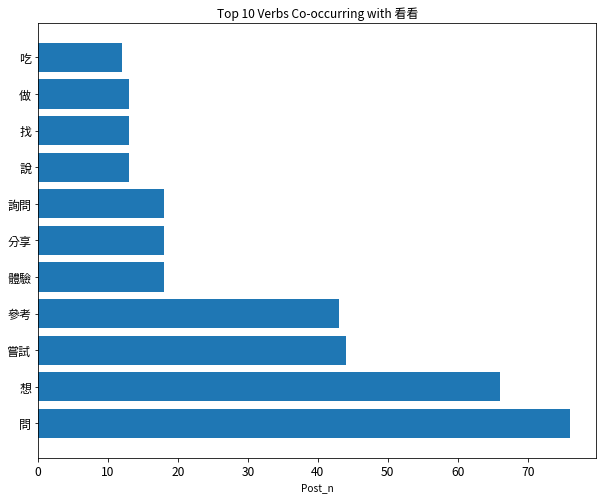

In [21]:
# plot

fig, ax = plt.subplots(figsize=(10,8))


df = kankan_result[:11]

#assigning variables
x = df['FrontVerb']
y = df['count']

#Graphing
plt.barh(x,y)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Verbs Co-occurring with ÁúãÁúã")
plt.xlabel("Post_n")
plt.show()

### ÊÉ≥ÁúãÁúã vs ÊÉ≥ÁúãÁúã

In [27]:
kankan_df = pd.read_pickle('./data/kankan_df.pkl')

In [28]:
pd.set_option('display.max_rows',1000)
kankan_df.loc[kankan_df['FrontVerb']=='ÊÉ≥']['Kankan_text']

293      [Áúã, ÁãÑÂç°, ÊòØ, ÊÉ≥, ÁúãÁúã, ‰∏çÂêå, Âú∞Êñπ, Ë®éË´ñÂçÄ]
294      [ÁöÑ, ÊñáÁ´†, ÁÑ°ËÅä, ÊÉ≥, ÁúãÁúã, ËÉΩ‰∏çËÉΩ, ÈñãÁâà, Êõ¥]
295      [ÂèØ‰ª•, Êé•Âèó, ÁöÑ, ÊÉ≥, ÁúãÁúã, ‰∏ñÁïå, ÂÜ†Ëªç, Â∫óÂÆ∂]
296       [ËÜ†Âõä, ÁöÑ, ÂÉπÈå¢, ÊÉ≥, ÁúãÁúã, Ëù¶ÁöÆ, Êàñ, ÊãçË≥£]
297      [‰æøÂÆú, ÁöÑ, ÊâÄ‰ª•, ÊÉ≥, ÁúãÁúã, Â§ßÂÆ∂, ÁöÑ, Áí∞‰øùË¢ã]
298          [Â§™, Âà∞, ‰∫Ü, ÊÉ≥, ÁúãÁúã, Â§ßÂÆ∂, ÁöÑ, ÊÆº]
299       [Ë®±Â§ö, Êú¨‰æÜ, ‰∏ä, ÊÉ≥, ÁúãÁúã, ÁöÑ, Ë∂ÖÁåõ, ÊªëÁêÉ]
300          [ÈÇ£, Êàë, Â∞±, ÊÉ≥, ÁúãÁúã, ‰ªñ, ÁöÑ, ÁÖßÁâá]
301        [Êàë, ÁúüÁöÑ, Âæà, ÊÉ≥, ÁúãÁúã, ÂêÑ‰Ωç, Âç°Âèã, ÈÉΩ]
302          [ÈÄ£Áµê, Êàë, ‰πü, ÊÉ≥, ÁúãÁúã, ‰Ω†, ÊòØ, ‰∏ç]
303         [ÂÄã, ÊòØ, Áâà, ÊÉ≥, ÁúãÁúã, Â§ßÂÆ∂, ÊâãÂ∏≥, ÈÉΩ]
304        [ÊêñÈ†≠, ‰ΩÜ, Âèà, ÊÉ≥, ÁúãÁúã, ÂÆ§ÂèãÁî∑, ÊòØ, ‰∏ç]
305        [‰ªñ, ÁèæÂú®, Âè™, ÊÉ≥, ÁúãÁúã, ÁúºÂâç, ÈÄô, ÂÜ∑Ê∏Ö]
306         [Êúâ, Ê©üÊúÉ, ‰πü, ÊÉ≥, ÁúãÁúã, Êúâ, Ê≤íÊúâ, Áßü]
307         [‰πÖ, ‰∫Ü, ‰πü, ÊÉ≥, ÁúãÁúã, ‰∏çÂêå, ËÖîË™ø, ÁöÑ]
308    [ÂñúÊ≠°, Êé®ÁêÜÁâá, ÊàñÊòØ, ÊÉ≥

## Find posts with VVÁúã

In [15]:
text_df = pd.read_pickle('./data/dcard_text_df.pkl')

In [49]:
# find regex of VVÁúã
v_list = []
v_pos_list = []
k_texts= []
k_ids = []
for i, r in text_df.iterrows():
    if 'Áúã' in r['Content_ws']:
        kk= r['Content_ws'].index('Áúã')
        if 'V' in r['Content_pos'][kk-1] and r['Content_pos'][kk-1]!='VH':
            if len(r['Content_ws'][kk-1])==2 or len(r['Content_ws'][kk-1])==4:
                front_verb = r['Content_ws'][kk-1]
                chars = list(front_verb)
                if len(chars)==2 and chars[0]==chars[1]:
                    front_verb = "".join(chars)
                    k_ids.append(kk)
                    v_list.append(front_verb)
                    v_pos_list.append(r['Content_pos'][kk-1])  
                    if kk <= (len(r['Content_ws'])-4) and kk >=4:
                        k_texts.append(r['Content_ws'][kk-4:kk+4])
                    else:
                        k_texts.append(r['Content_ws'])

                elif len(chars)==4:
                    dup = [x for x in chars if chars.count(x) > 1]
                    front_verb = "".join(dup)
                    k_ids.append(kk)
                    v_list.append(front_verb)
                    v_pos_list.append(r['Content_pos'][kk-1]) 
                    if kk <= (len(r['Content_ws'])-4) and kk >=4:
                        k_texts.append(r['Content_ws'][kk-4:kk+4])
                    else:
                        k_texts.append(r['Content_ws'])               
                    

In [ ]:
vvk_df = text_df.iloc[k_ids]
vvk_df['VVK_text'] = k_texts
vvk_df['FrontVerb'] = v_list
vvk_df['FrontVerb_pos'] = v_pos_list
vvk_df['Type'] = 'Áúã'
vvk_df = vvk_df[['PostId','FrontVerb','Type','VVK_text','Content_ws','Content_pos','FrontVerb_pos']]

In [51]:
vvk_df.shape

(441, 7)

In [52]:
vvk_df = vvk_df.sort_values(by=['FrontVerb','PostId']).reset_index(drop=True)
vvk_result = vvk_df.groupby(["FrontVerb",'FrontVerb_pos'])['FrontVerb'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

In [64]:
#vvk_df.to_pickle('./data/vvk_df.pkl')

In [62]:
#vvk_result.to_pickle('./data/vvk_result.pkl')

### Top 10 Verb in VVÁúã

In [61]:
# ÂÖ±ÁèæÁöÑÂãïË©ûpos typeÊï∏Èáè
from collections import Counter 
Counter(vvk_result['FrontVerb_pos'])

Counter({'VE': 11, 'VF': 3, 'VC': 38, 'VA': 6, 'VJ': 1, 'VCL': 2, 'VD': 1})

In [58]:
# ÂÖ±ÁèæÁöÑÂãïË©ûtypeÊï∏Èáè
len(set(vvk_result['FrontVerb']))

56

In [59]:
# ÂÖ±ÁèæÊ¨°Êï∏summary
vvk_result['count'].describe()

count    62.000000
mean      7.112903
std      16.298552
min       1.000000
25%       1.000000
50%       1.000000
75%       4.000000
max      81.000000
Name: count, dtype: float64

In [60]:
# ÂÖ±ÁèæÊ¨°Êï∏ÊúÄÂ§öÁöÑÂâçÂçÅÂÄãÂãïË©û
vvk_result.head(10)

FrontVerb FrontVerb_pos  count
47        Ë©¶Ë©¶            VE     81
7         ÂïèÂïè            VE     81
48        Ë©¶Ë©¶            VF     59
43        ËÅΩËÅΩ            VE     28
46        Ë©¶Ë©¶            VC     26
6         ÂêÉÂêÉ            VC     17
3         ÂÅöÂÅö            VC     15
15        ÊâæÊâæ            VC     12
8         ÂñùÂñù            VC     12
30        Áé©Áé©            VC     10

**Plot Ââç10 ÂÖ±ÁèæÁöÑverb**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

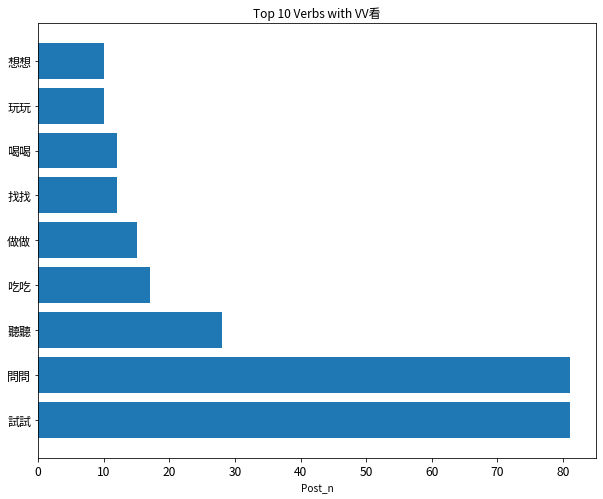

In [83]:
# plot

fig, ax = plt.subplots(figsize=(10,8))


df = vvk_result[:11]

#assigning variables
x = df['FrontVerb']
y = df['count']

#Graphing
plt.barh(x,y)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Verbs with VVÁúã")
plt.xlabel("Post_n")
plt.show()

## Á∏ΩÊ¨°Êï∏ÊúÄÂ§ö„ÄÅÁõ∏Â∑ÆÊ¨°Êï∏ÊúÄÂ§ö„ÄÅÂÖ©ÊßãÂºèÁöÜÊúâ

In [57]:
def plot_barh(data_df, x_col, y_col,titletext):
    fig, ax = plt.subplots(figsize=(10,8))
    df = data_df[:11]

    #assigning variables
    x = df[x_col]
    y = df[y_col]

    #Graphing
    plt.barh(x,y)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(titletext)
    plt.xlabel("Post_n")
    plt.show()

In [29]:
vvk_result = pd.read_pickle('./data/vvk_result.pkl')
kankan_result = pd.read_pickle('./data/kankan_result.pkl')

In [35]:
# ÂÖ©ÂÄãÂêÑËá™ÁöÑÂãïË©ûdict
vvk_dict =dict(zip(vvk_result['FrontVerb'], vvk_result['count']))
kankan_dict = dict(zip(kankan_result['FrontVerb'], kankan_result['count']))

In [37]:
# ËÅØÈõÜÂãïË©û
union_verbs = []
for v in vvk_dict.keys():   # ÈÄôË£°Èù¢ÁöÑkeyÊòØÁñäÂ≠ó
    union_verbs.append(v[0])

for v in kankan_dict.keys():   # ÈÄôË£°Èù¢ÁöÑkeyÂè™Êúâ‰∏ÄÂÄãÂ≠ó
    union_verbs.append(v)

union_verbs = list(set(union_verbs))
len(union_verbs)

284

In [46]:
datalist = []
# ÂÅöÊàêÂ§ßË°®
for v in union_verbs:
    data = [v]
    if v in kankan_dict.keys():     # ÊúâVÁúãÁúã
        data.append(kankan_dict[v])
    else:
        data.append(0)
    if (v*2) in vvk_dict.keys():    # ÊúâvvÁúã
        data.append(vvk_dict[(v*2)])
    else:
        data.append(0)
    
    sum = data[1]+data[2]
    gap = max(data[1], data[2]) - min(data[1], data[2])
    data.append(sum)
    data.append(gap)
    
    datalist.append(data)

len(datalist)

284

In [54]:
union_df = pd.DataFrame(datalist, columns=['FrontVerb', 'VÁúãÁúã_n', 'vvÁúã_n', 'Âá∫ÁèæÁ∏ΩÊ¨°Êï∏', 'Áõ∏Â∑ÆÊ¨°Êï∏'])

In [56]:
union_df.to_pickle('./data/union_df.pkl')

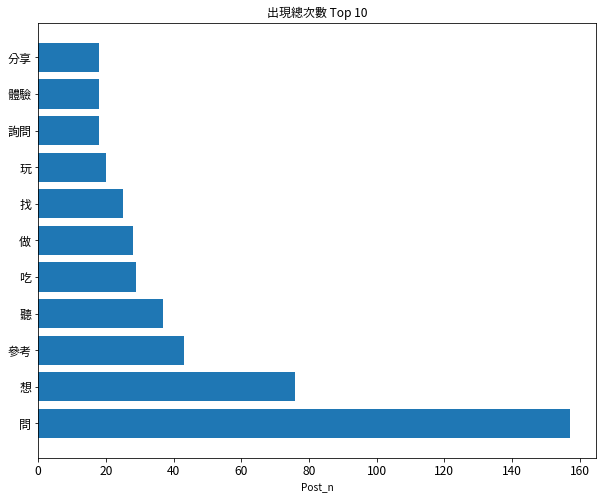

In [58]:
df = union_df.sort_values(['Âá∫ÁèæÁ∏ΩÊ¨°Êï∏'], ascending=False).reset_index(drop=True)
plot_barh(df, 'FrontVerb', 'Âá∫ÁèæÁ∏ΩÊ¨°Êï∏', 'Âá∫ÁèæÁ∏ΩÊ¨°Êï∏ Top 10')

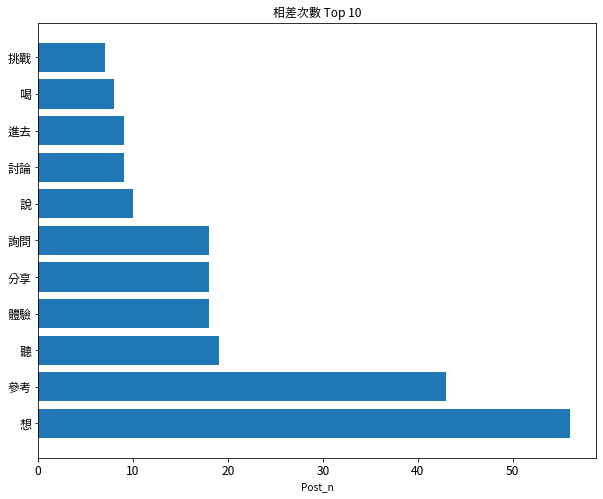

In [59]:
df = union_df.sort_values(['Áõ∏Â∑ÆÊ¨°Êï∏'], ascending=False).reset_index(drop=True)
plot_barh(df, 'FrontVerb', 'Áõ∏Â∑ÆÊ¨°Êï∏', 'Áõ∏Â∑ÆÊ¨°Êï∏ Top 10')

**ÂÖ©ÊßãÂºèÁöÜÊúâÂá∫Áèæ**

In [62]:
output = []
df = union_df.loc[(union_df['VÁúãÁúã_n']!=0) & (union_df['vvÁúã_n']!=0)]
df.sort_values(['Âá∫ÁèæÁ∏ΩÊ¨°Êï∏'], ascending=False).reset_index(drop=True)

FrontVerb  VÁúãÁúã_n  vvÁúã_n  Âá∫ÁèæÁ∏ΩÊ¨°Êï∏  Áõ∏Â∑ÆÊ¨°Êï∏
0          Âïè     76     81    157     5
1          ÊÉ≥     66     10     76    56
2          ËÅΩ      9     28     37    19
3          ÂêÉ     12     17     29     5
4          ÂÅö     13     15     28     2
5          Êâæ     13     12     25     1
6          Áé©     10     10     20     0
7          Ë™™     13      3     16    10
8          Âñù      4     12     16     8
9          Áî®      3      9     12     6
10         ËÅû      5      4      9     1
11         Ë≤∑      4      4      8     0
12         Âöê      1      6      7     5
13         Áåú      2      4      6     2
14         Êë∏      1      4      5     3
15         Ë©¶      4      1      5     3
16         ËÆÄ      1      2      3     1
17         Êãç      2      1      3     1
18         ÈÅ∏      2      1      3     1
19         Áúã      1      2      3     1
20         ËÄÉ      1      2      3     1
21         ÈÄõ      1      1      2     0
22         Ëæ¶      1      1      2     0
23         Ë≥≠      1      1      2     0
24         ÈÄÅ      1      1      2     0
25         Áôº      1      1      2     0
26         Êè™      1      1      2     0
27         Êê≠      1      1      2     0
28         Êäï      1      1      2     0
29         Á≠â      1      1      2     0